In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "drive/MyDrive/Group Project - Cellular IoT Handoff/better_csvs"
os.listdir(PATH)

['board-1669508088-mobility_driving_desert5_11_26_2022',
 'board-1669508088-mobility_driving_desert6_11_26_2022_2',
 'board-1669508088-mobility_driving_desert6_11_26_2022_1',
 'board-1669263405-mobility_driving2_11_23_2022',
 'board-1669926487-mobility_walking_ucla1_12_1_2022',
 'board-1669149465-mobility_walking_REAL_attempt5_11_22_2022',
 'board-1669928025-mobility_walking_ucla2_12_1_2022',
 'board-1669940282-mobility_walking_ucla3_12_1_2022']

In [ ]:
w_rrc_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_rrc_df = pd.DataFrame(columns = ["msg_type", "latency"])
w_nas_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_nas_df = pd.DataFrame(columns = ["msg_type", "latency"])

In [ ]:
for dir in os.listdir(PATH)[2:]:
  if "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      if "nas" in file:
        myline = f.readline()
        while myline:
          try:
            myline = f.readline()
            to_add = float(myline[:-1])
            w_nas_df.loc[len(w_nas_df.index)] = [name,to_add] 
          except:
            continue
      elif "rrc" in file:
        myline = f.readline()
        while myline:
          try:
            myline = f.readline()
            to_add = float(myline[:-1])
            w_rrc_df.loc[len(w_rrc_df.index)] = [name,to_add] 
          except:
            continue

In [ ]:
for dir in os.listdir(PATH)[2:]:
  if "driving" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      if "nas" in file:
        myline = f.readline()
        while myline:
          try:
            myline = f.readline()
            to_add = float(myline[:-1])
            d_nas_df.loc[len(d_nas_df.index)] = [name,to_add] 
          except:
            continue
      elif "rrc" in file:
        myline = f.readline()
        while myline:
          try:
            myline = f.readline()
            to_add = float(myline[:-1])
            d_rrc_df.loc[len(d_rrc_df.index)] = [name,to_add] 
          except:
            continue

In [ ]:
w_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_df = pd.DataFrame(columns = ["msg_type", "latency"])

In [ ]:
for dir in os.listdir(PATH)[2:]:
  if "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          myline = f.readline()
          to_add = float(myline[:-1])
          w_df.loc[len(w_df.index)] = [name,to_add] 
        except:
          continue

In [ ]:
for dir in os.listdir(PATH)[2:]:
  if "driving" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          myline = f.readline()
          to_add = float(myline[:-1])
          d_df.loc[len(d_df.index)] = [name,to_add] 
        except:
          continue

In [ ]:
drive_but_not_walk = []
for x in d_df["msg_type"].unique():
  if x not in w_df["msg_type"].unique():
    drive_but_not_walk.append(x)
    print(x)

authentication_request_to_authentication_response
authentication_response_to_security_mode_command


In [ ]:
walk_but_not_drive = []
for x in w_df["msg_type"].unique():
  if x not in d_df["msg_type"].unique():
    walk_but_not_drive.append(x)
    print(x)

active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
idle_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
activate_default_eps_bearer_context_request_to_attach_complete
esm_information_response_to_attach_accept
active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept
attach_complete_to_pdn_connectivity_request
idle_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept


In [ ]:
common_vals = []
for x in w_df["msg_type"].unique():
  if x in d_df["msg_type"].unique():
    common_vals.append(x)
    print(x)

handover_connection_reconfiguration_to_connection_reconfiguration_complete
connection_setup_to_connection_setup_complete
non_handover_connection_reconfiguration_to_connection_reconfiguration_complete
connection_setup_complete_to_security_mode_command
security_mode_command_to_security_mode_complete
service_request_to_pdn_connectivity_request
esm_information_request_to_esm_information_response
handover_measurement_report_to_connection_reconfiguration
non_handover_security_mode_complete_to_connection_reconfiguration
connection_request_to_connection_setup
service_request_to_tracking_area_update_request
tracking_area_update_request_to_tracking_area_update_accept


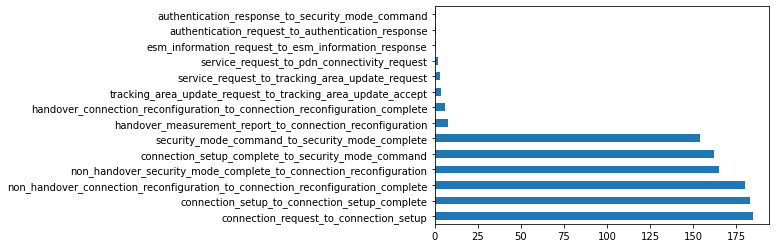

In [ ]:
d_df['msg_type'].value_counts().plot(kind='barh')

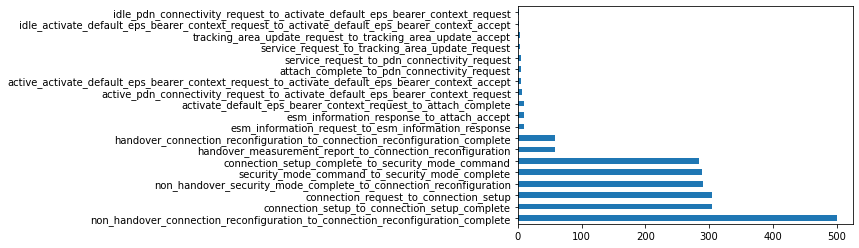

In [ ]:
w_df['msg_type'].value_counts().plot(kind='barh')

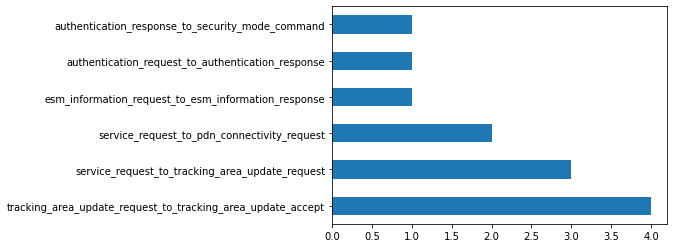

In [ ]:
d_nas_df['msg_type'].value_counts().plot(kind='barh')

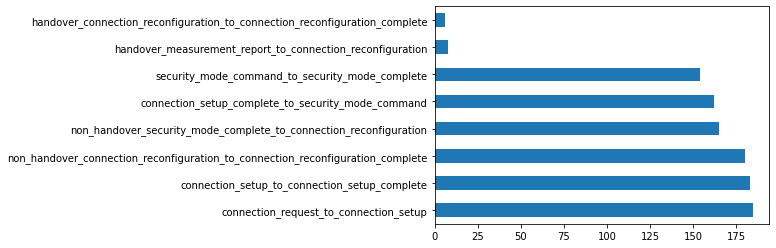

In [ ]:
d_rrc_df['msg_type'].value_counts().plot(kind='barh')

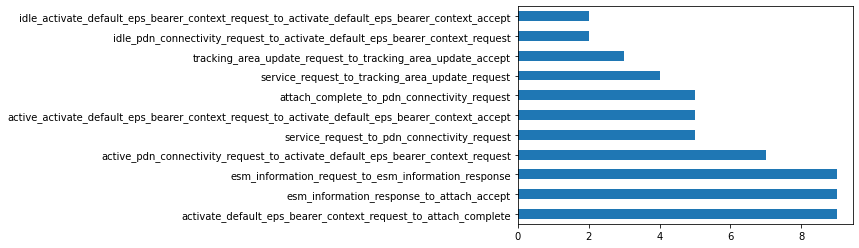

In [ ]:
w_nas_df['msg_type'].value_counts().plot(kind='barh')

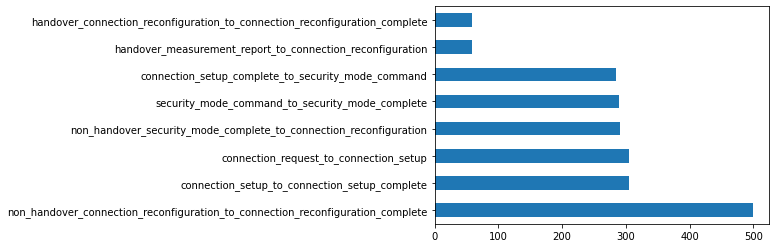

In [ ]:
w_rrc_df['msg_type'].value_counts().plot(kind='barh')

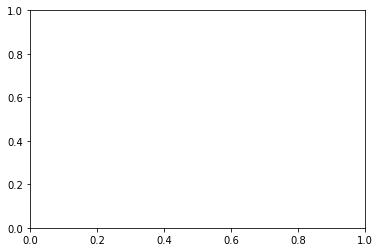

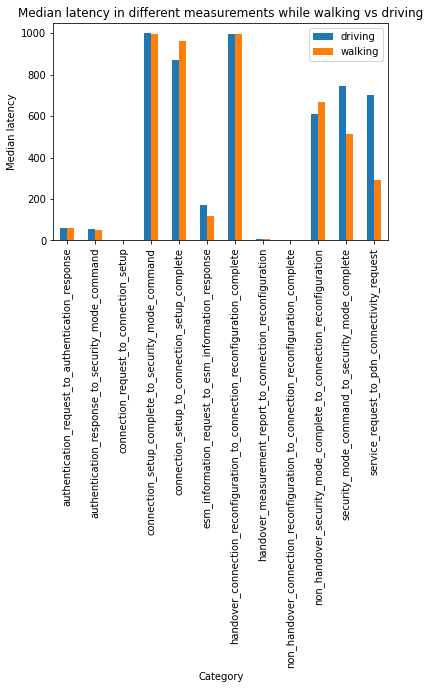

In [ ]:
fig, ax = plt.subplots()
d_df_common = d_df[d_df['msg_type'].isin(common_vals)].sort_values(by=['msg_type'])
w_df_common = w_df[w_df['msg_type'].isin(common_vals)].sort_values(by=['msg_type'])
driving_medians = d_df_common.groupby(d_df_common.msg_type)[['latency']].median()["latency"]
walking_medians = w_df_common.groupby(w_df_common.msg_type)[['latency']].median()["latency"]
to_plot = pd.DataFrame({'driving': driving_medians,'walking': walking_medians}, index=sorted(common_vals))
ax = to_plot.plot.bar(rot=0)
ax.set_xlabel('Category')
ax.set_ylabel('Median latency')
ax.set_title('Median latency in different measurements while walking vs driving')
ax.set_xticklabels(sorted(d_df["msg_type"].value_counts().index.to_list()), rotation = 90)
ax.legend()

# plt.show()

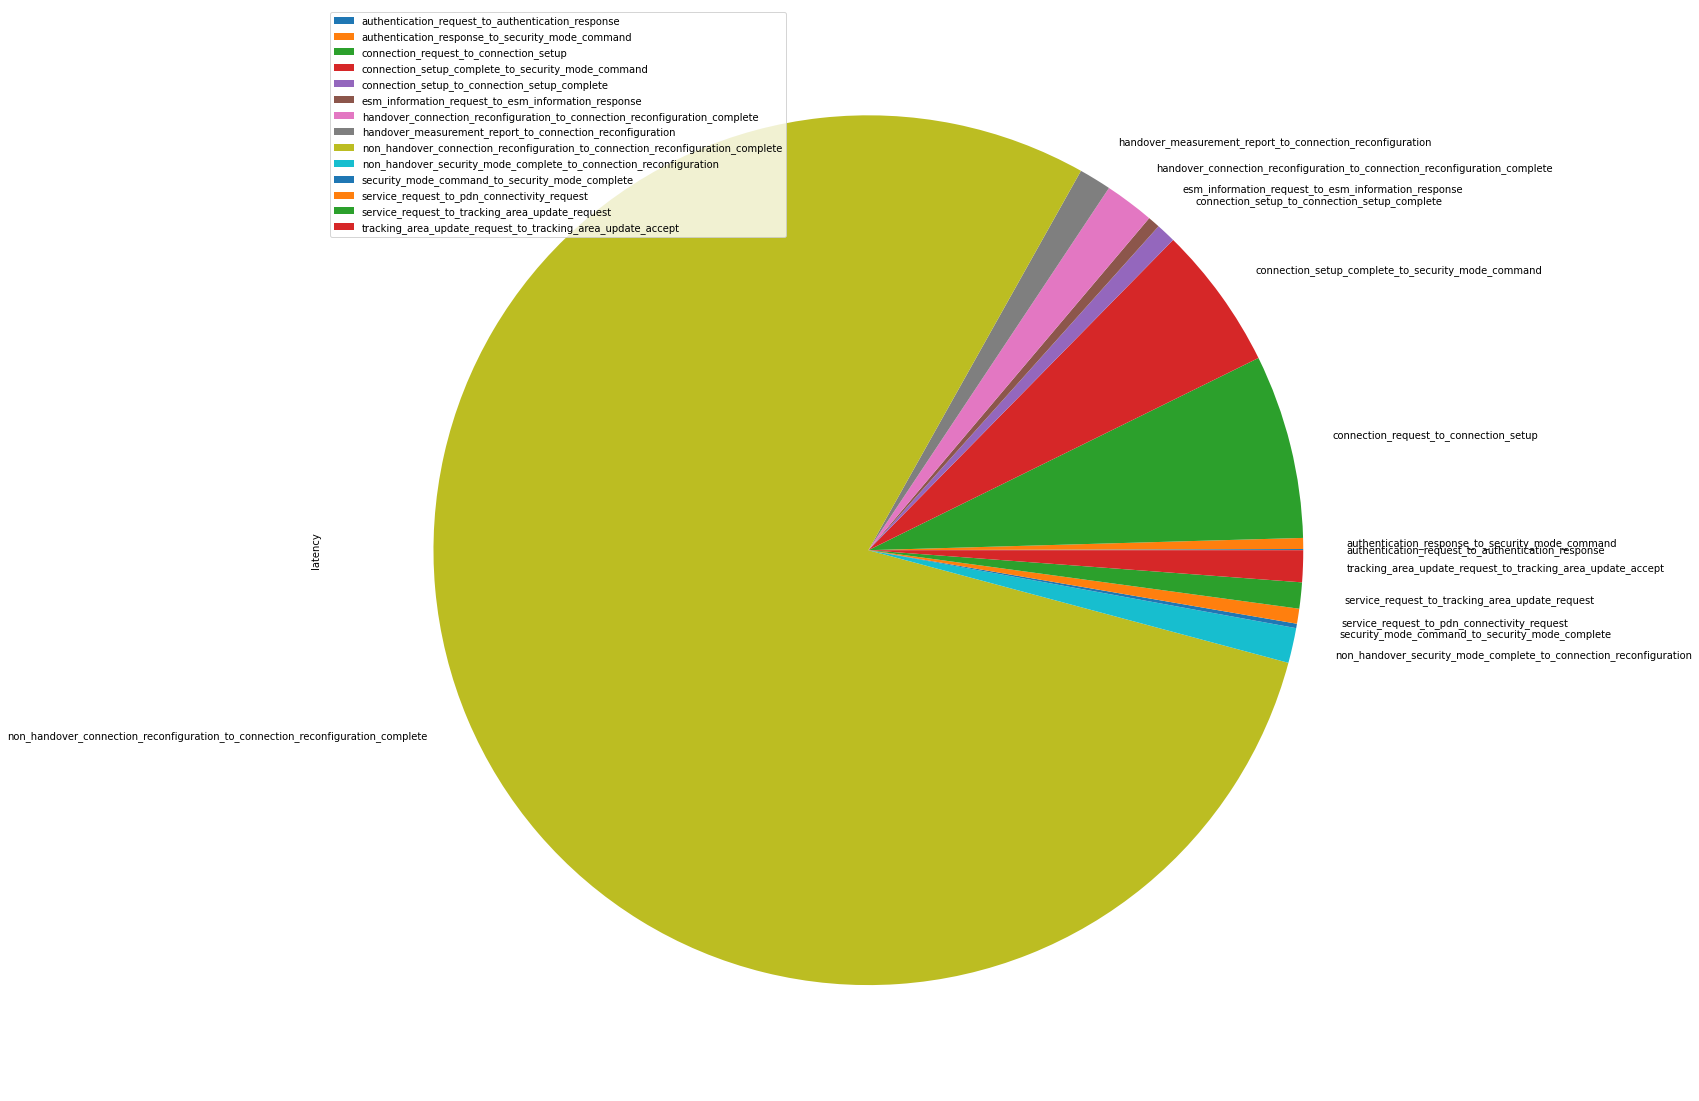

In [ ]:
d_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))


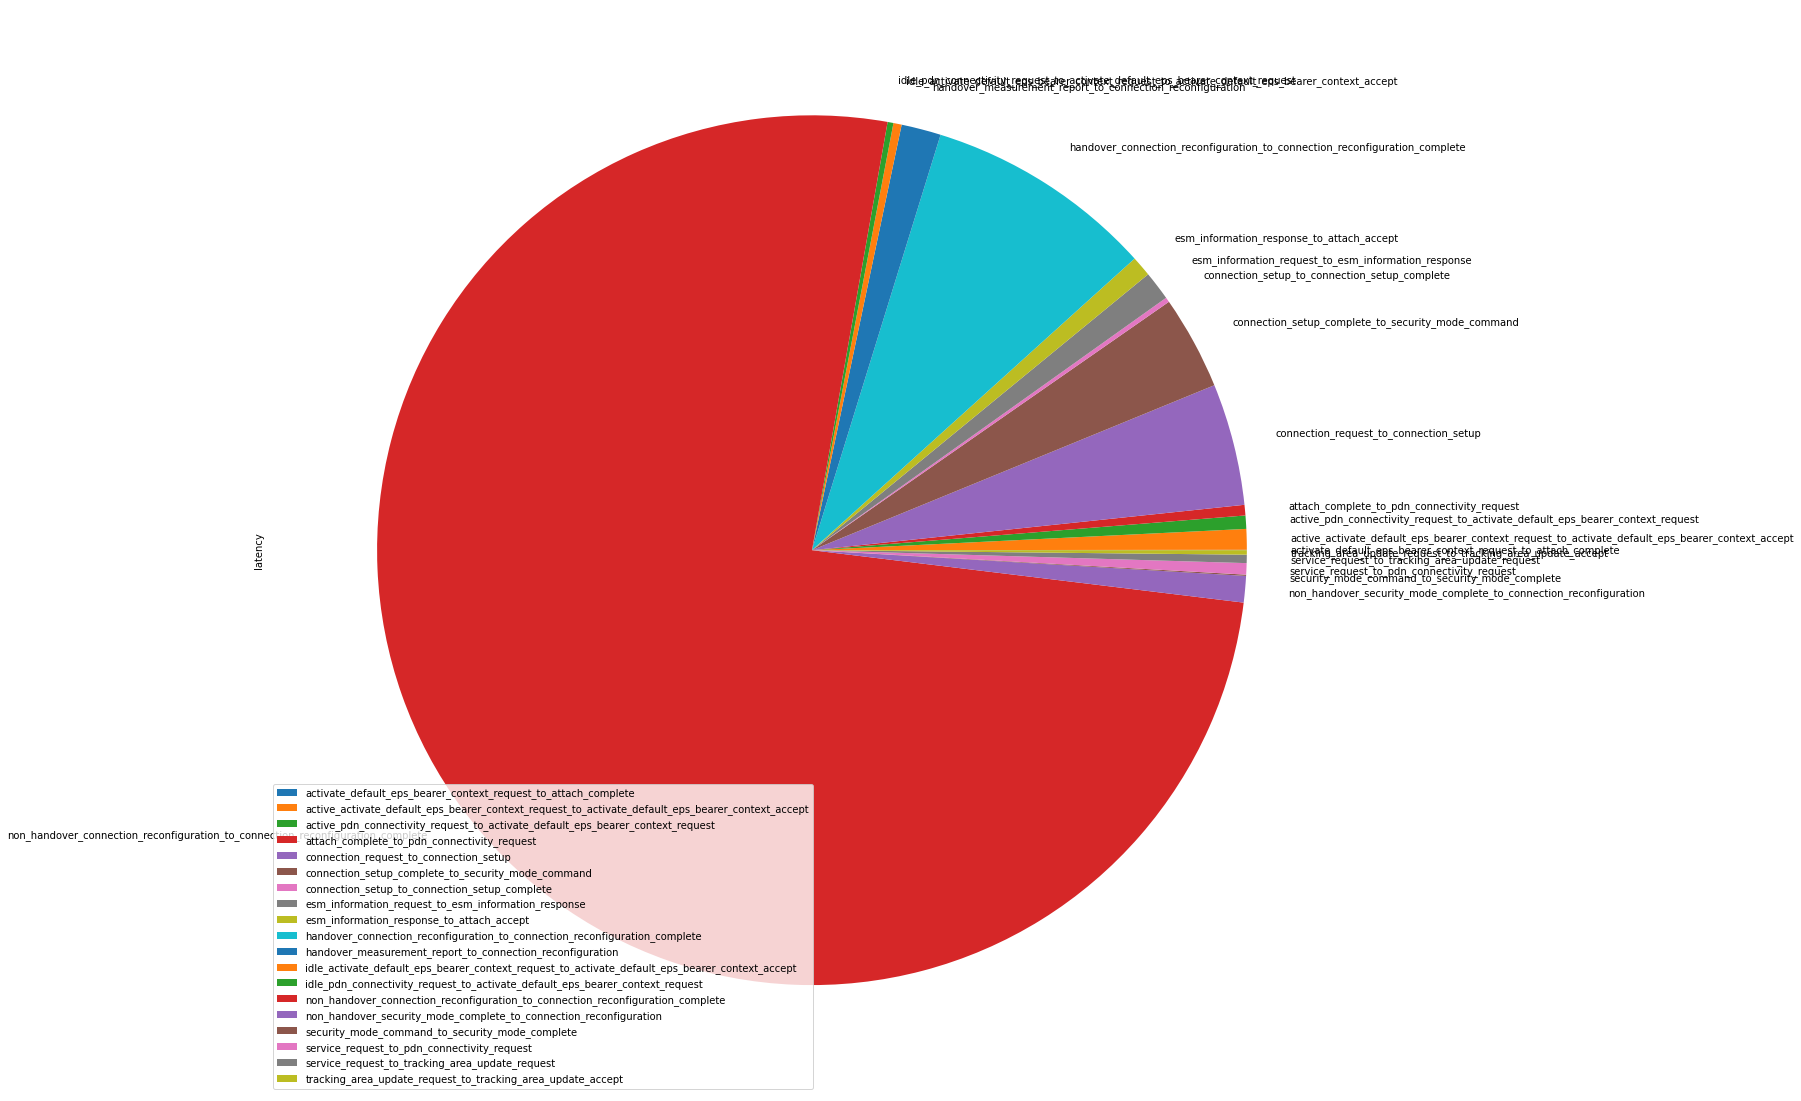

In [ ]:
w_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))

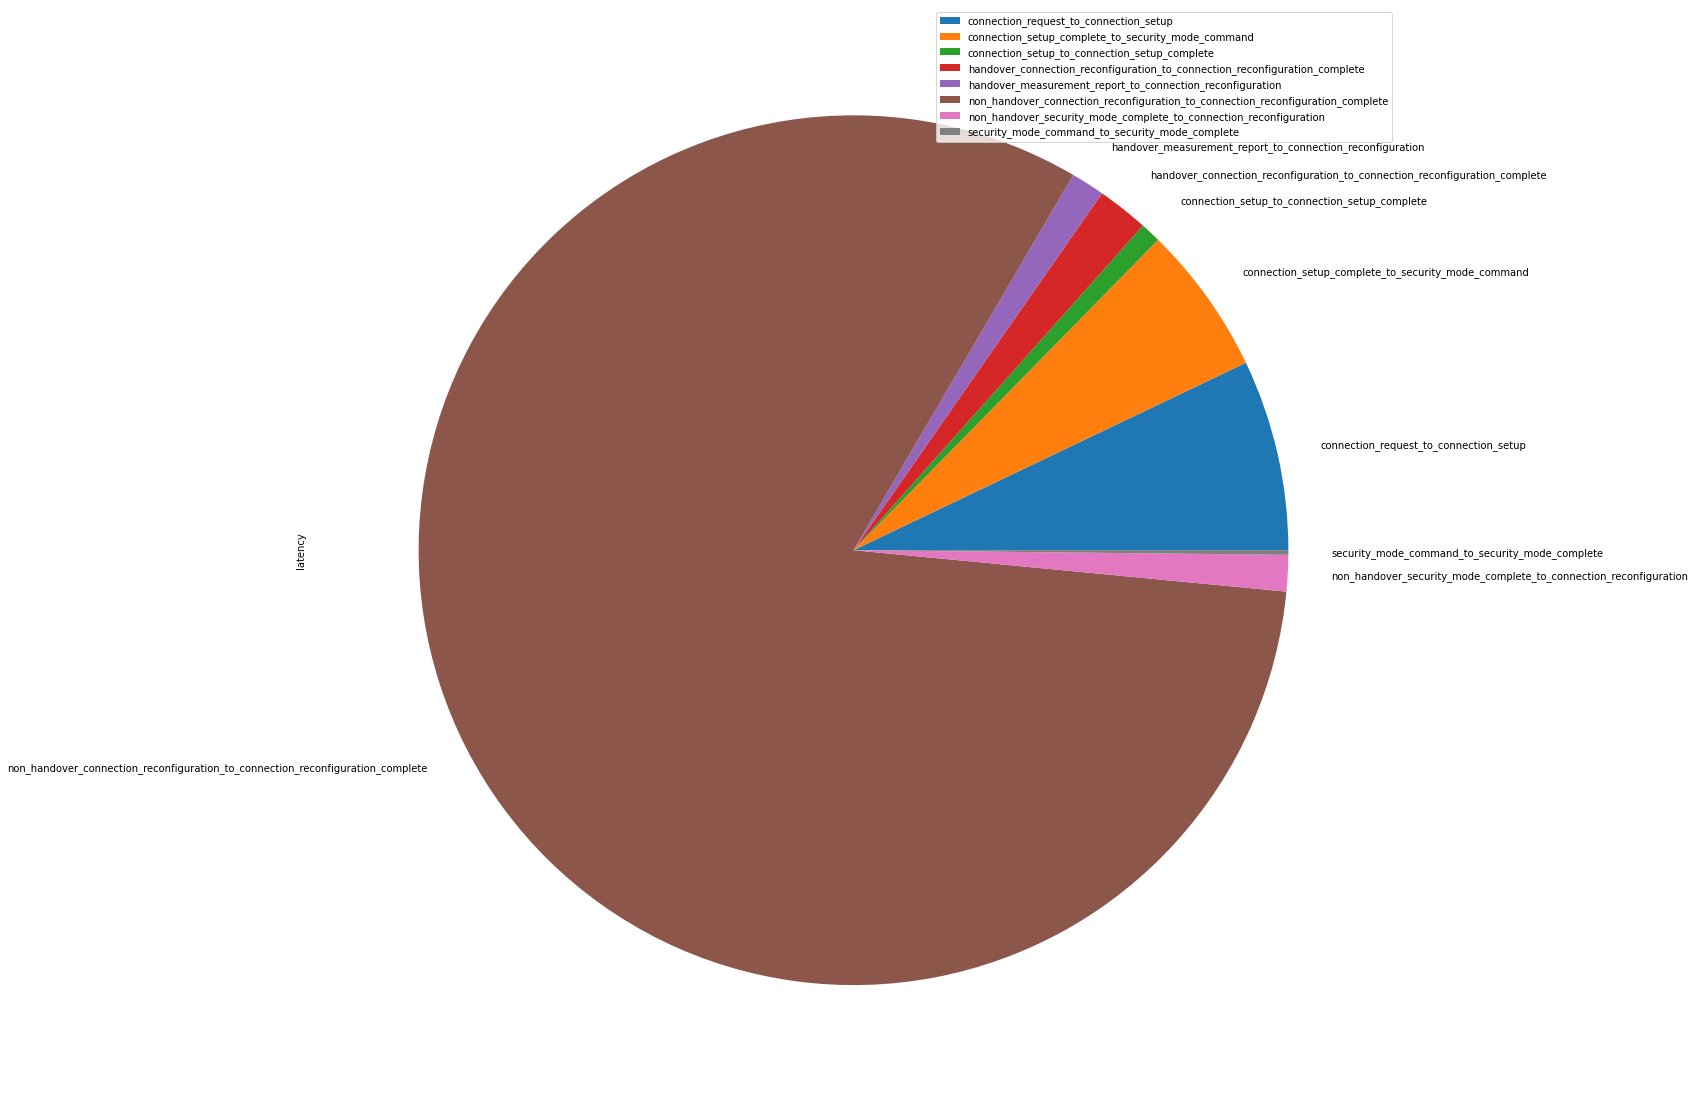

In [ ]:
d_rrc_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))

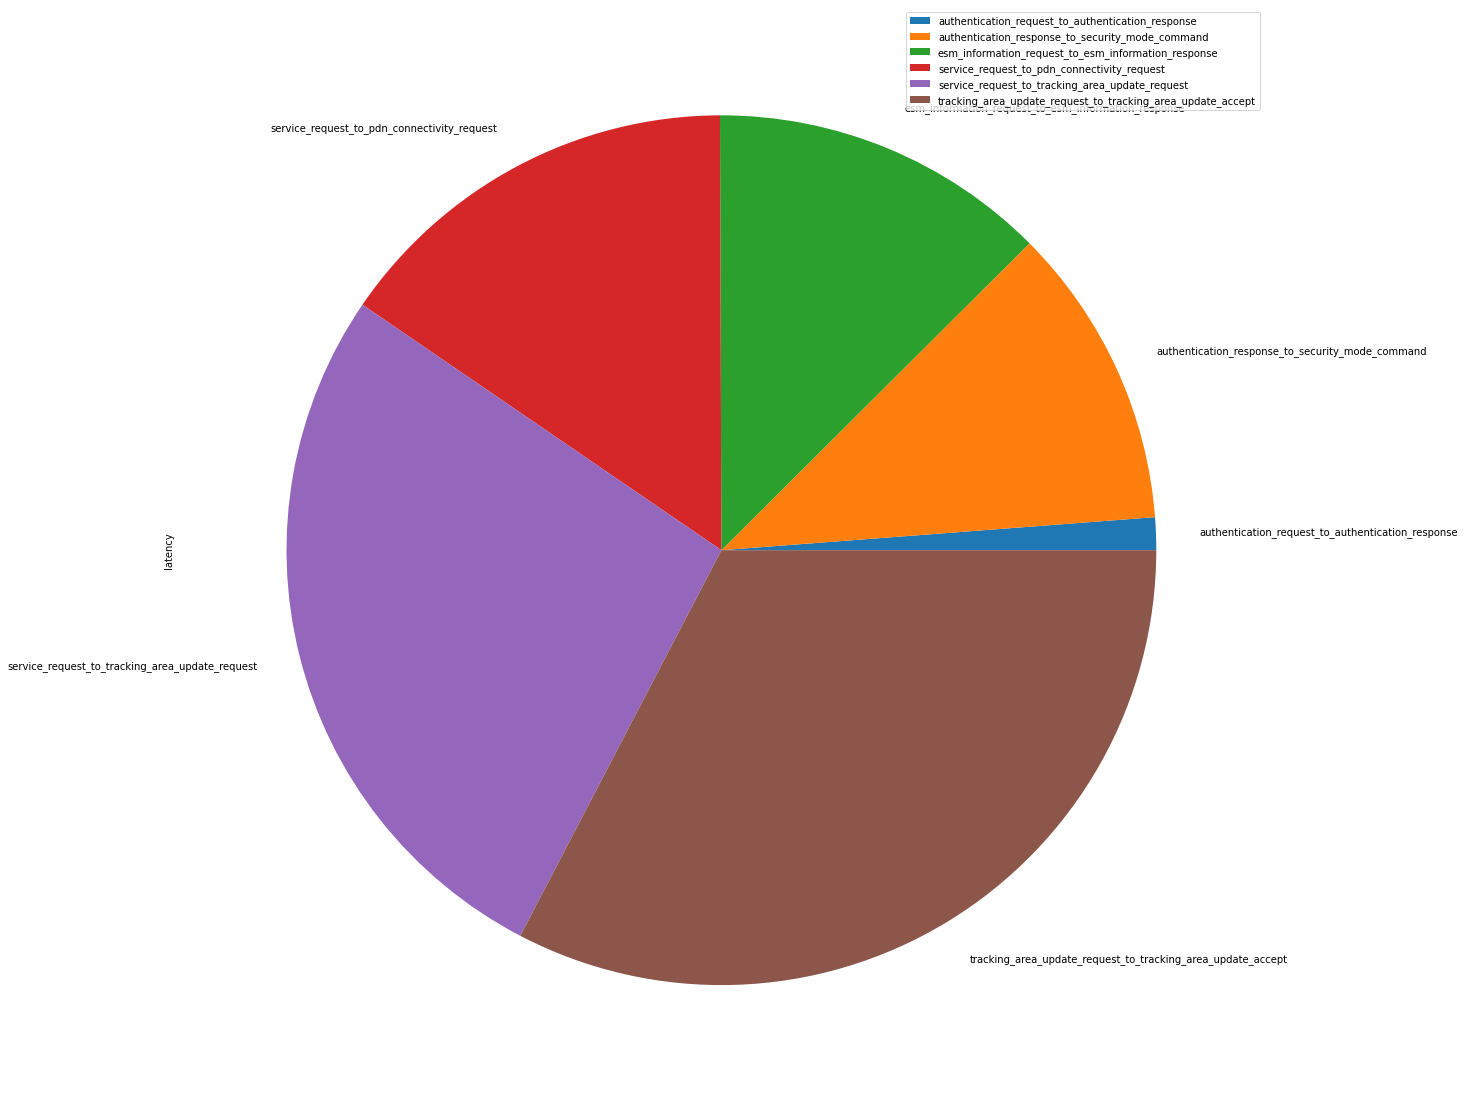

In [ ]:
d_nas_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))

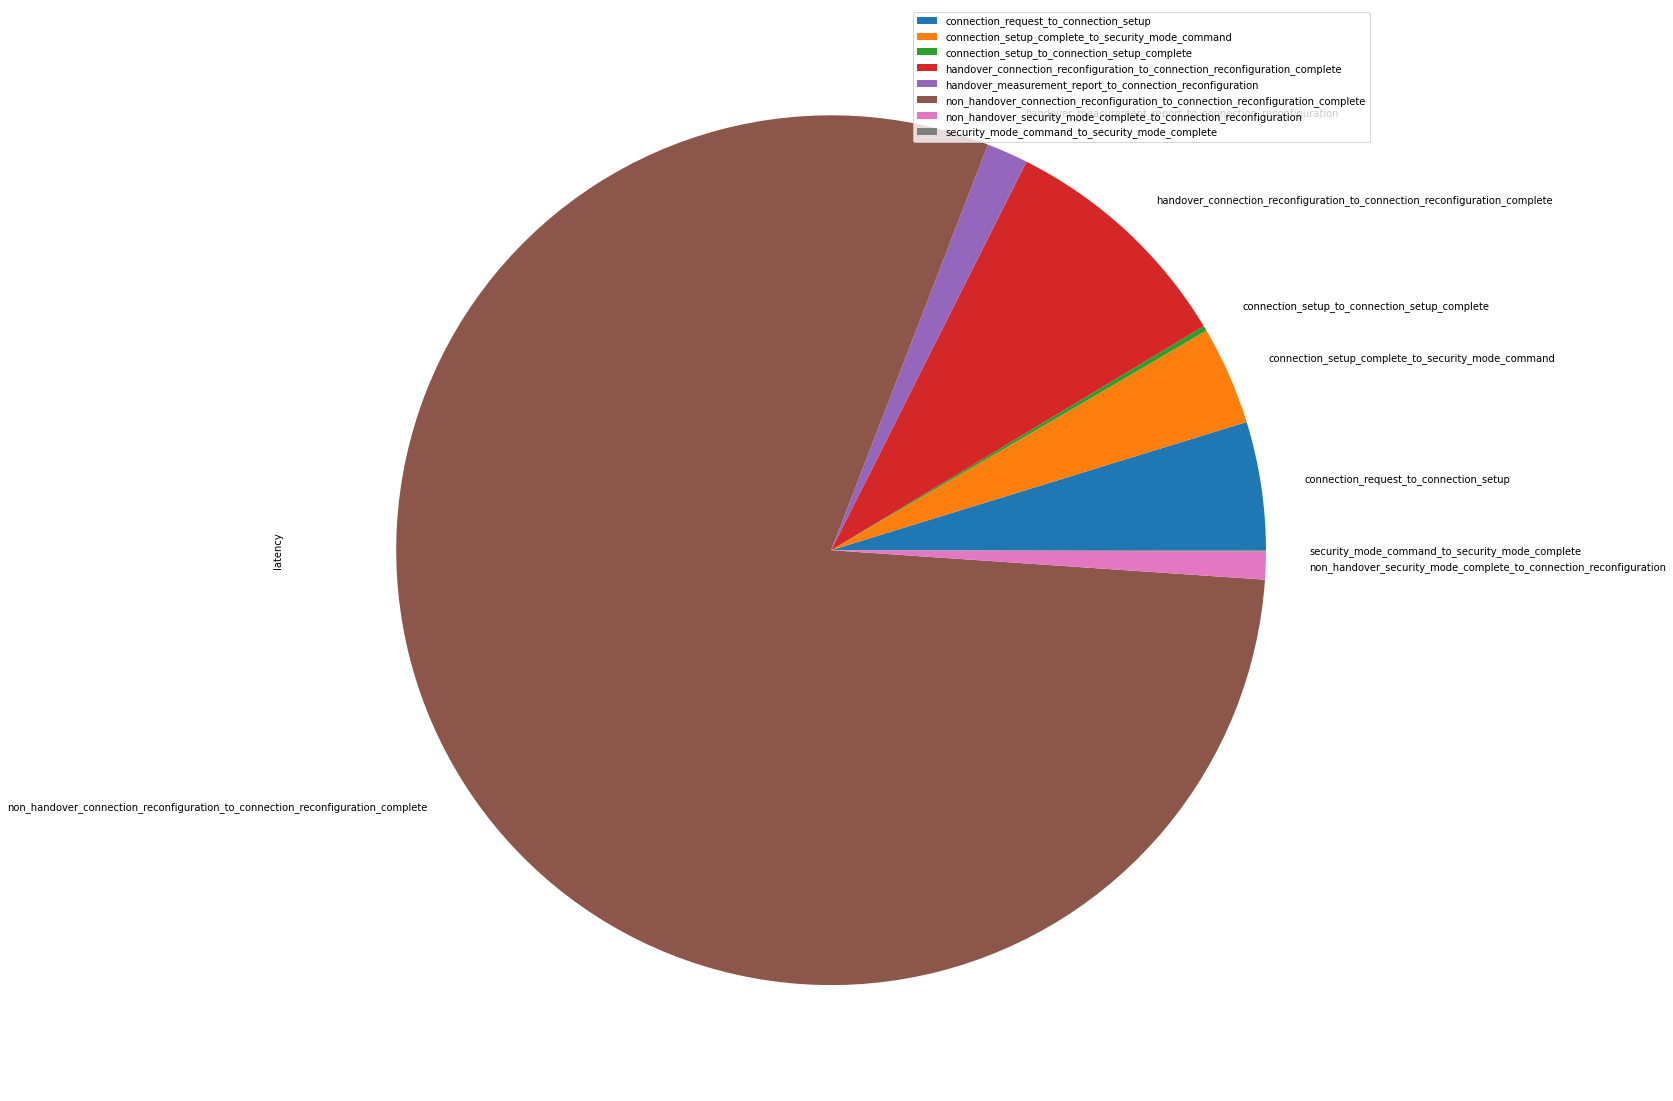

In [ ]:
w_rrc_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))

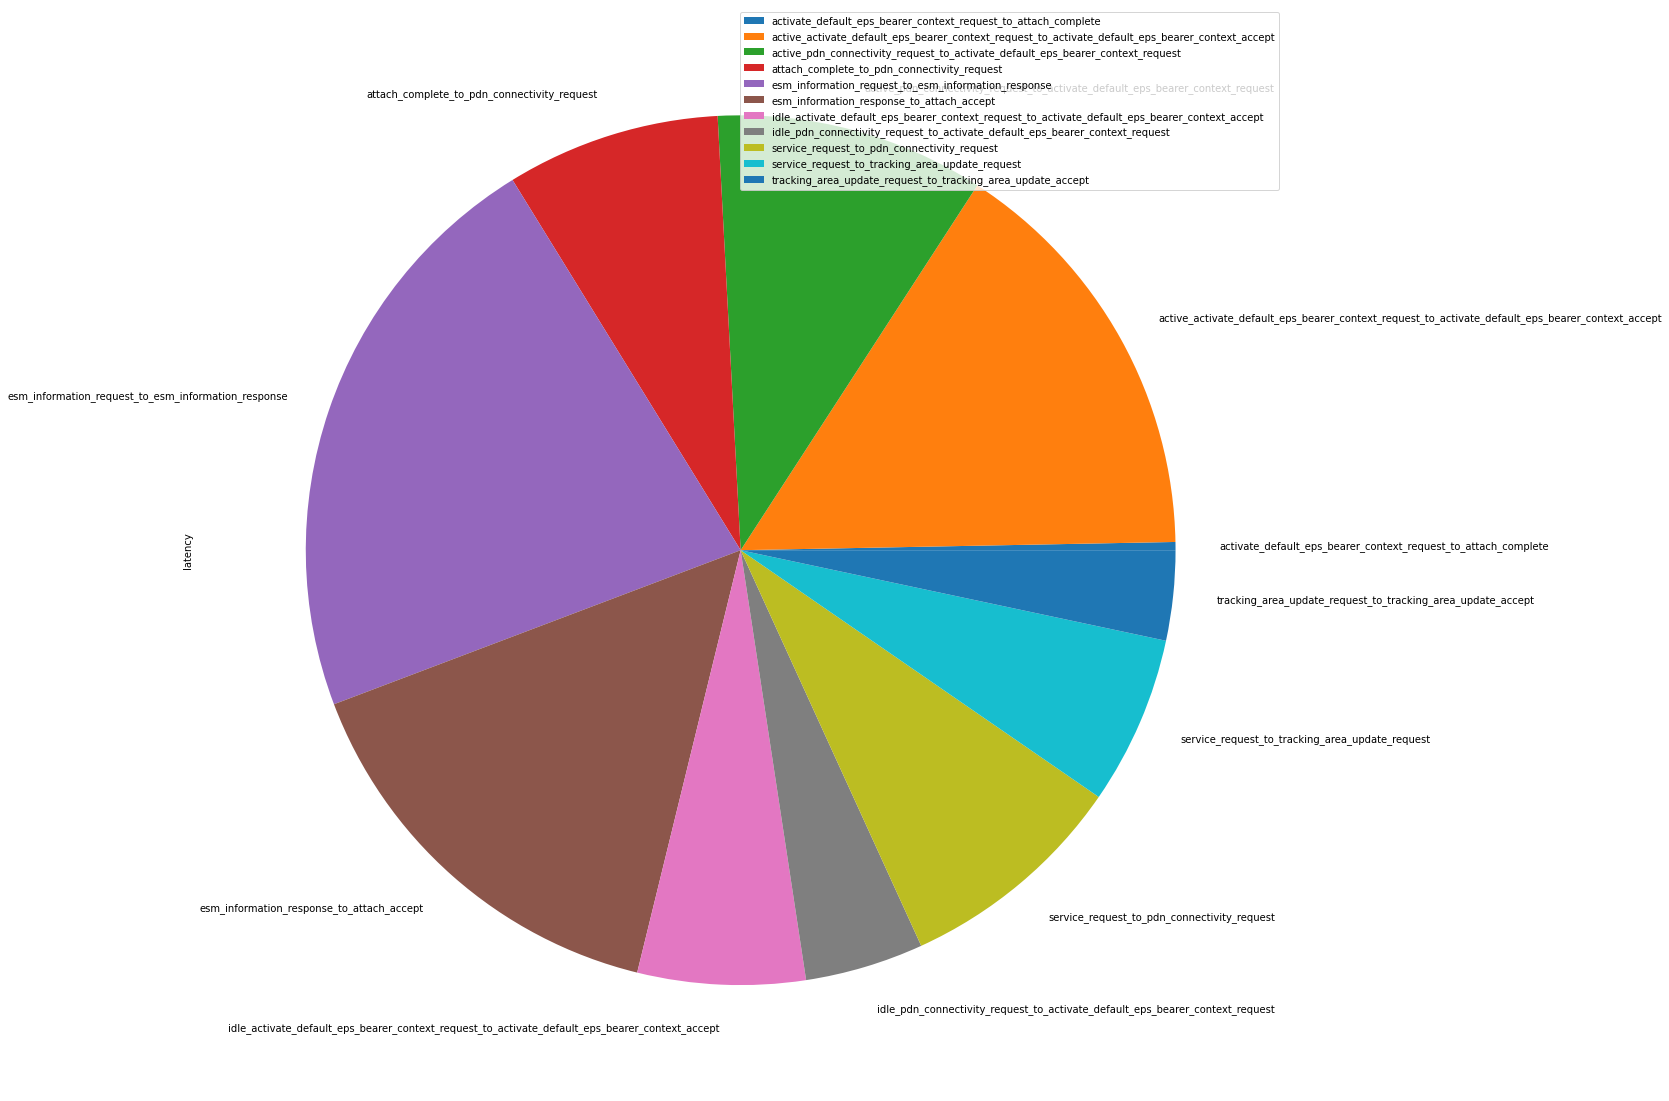

In [ ]:
w_nas_df.groupby(['msg_type']).sum().plot.pie(y='latency', figsize = (20,20))

In [ ]:
rrc_attach_order = ["connection_request_to_connection_setup", "connection_setup_to_connection_setup_complete", "connection_setup_complete_to_security_mode_command", "security_mode_command_to_security_mode_complete", "non_handover_security_mode_complete_to_connection_reconfiguration", "non_handover_connection_reconfiguration_to_connection_reconfiguration_complete"]
nas_attach_order = ["attach_request_to_authentication_request", "authentication_request_to_authentication_response", "authentication_response_to_security_mode_command", "security_mode_command_to_security_mode_complete", "security_mode_complete_to_esm_information_request", "esm_information_request_to_esm_information_response", "esm_information_response_to_attach_accept", "active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept", "activate_default_eps_bearer_context_request_to_attach_complete", "activate_default_eps_bearer_context_request"]
rrc_handover_order = ["handover_measurement_report_to_connection_reconfiguration", "handover_connection_reconfiguration_to_connection_reconfiguration_complete"]
rrc_attach_order += rrc_handover_order

In [ ]:
driving_medians = d_df_common.groupby(d_df_common.msg_type)[['latency']].median()["latency"]
walking_medians = w_df_common.groupby(w_df_common.msg_type)[['latency']].median()["latency"]
driving_rrc_medians = d_rrc_df.groupby(d_rrc_df.msg_type)[['latency']].median()["latency"]
walking_rrc_medians = w_rrc_df.groupby(w_rrc_df.msg_type)[['latency']].median()["latency"]
driving_nas_medians = d_nas_df.groupby(d_nas_df.msg_type)[['latency']].median()["latency"]
walking_nas_medians = w_nas_df.groupby(w_nas_df.msg_type)[['latency']].median()["latency"]

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'connection_request_to_connection_setup'),
 Text(0, 0, 'connection_setup_complete_to_security_mode_command'),
 Text(0, 0, 'connection_setup_to_connection_setup_complete'),
 Text(0, 0, 'handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'handover_measurement_report_to_connection_reconfiguration'),
 Text(0, 0, 'non_handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'non_handover_security_mode_complete_to_connection_reconfiguration'),
 Text(0, 0, 'security_mode_command_to_security_mode_complete')]

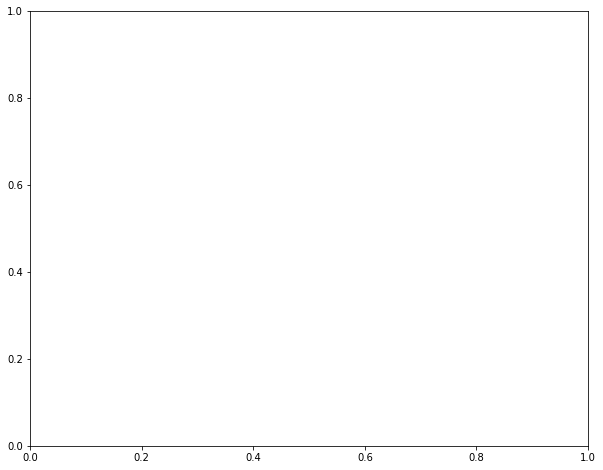

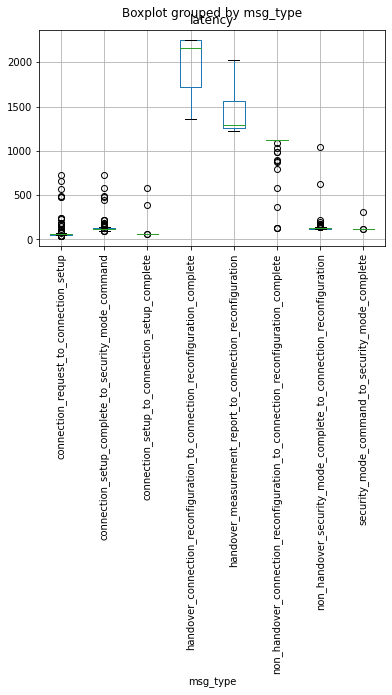

In [ ]:
rrc_attach_bias = []
running_sum = 0
for val in rrc_attach_order:
  rrc_attach_bias.append(running_sum)
  running_sum += driving_rrc_medians[val]
m_dict = {}
for val in range(len(rrc_attach_order)):
  m_dict[rrc_attach_order[val]] = rrc_attach_bias[val]
drm = d_rrc_df.copy()
for row, cols in drm.iterrows():
  if drm.at[row, "msg_type"] in rrc_attach_order:
    drm.at[row, "latency"] += m_dict[drm.at[row, "msg_type"]]

drm = drm.sort_values(by=['msg_type'])
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = drm.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(rrc_attach_order), rotation = 90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'activate_default_eps_bearer_context_request'),
 Text(0, 0, 'activate_default_eps_bearer_context_request_to_attach_complete'),
 Text(0, 0, 'active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept'),
 Text(0, 0, 'attach_request_to_authentication_request'),
 Text(0, 0, 'authentication_request_to_authentication_response'),
 Text(0, 0, 'authentication_response_to_security_mode_command')]

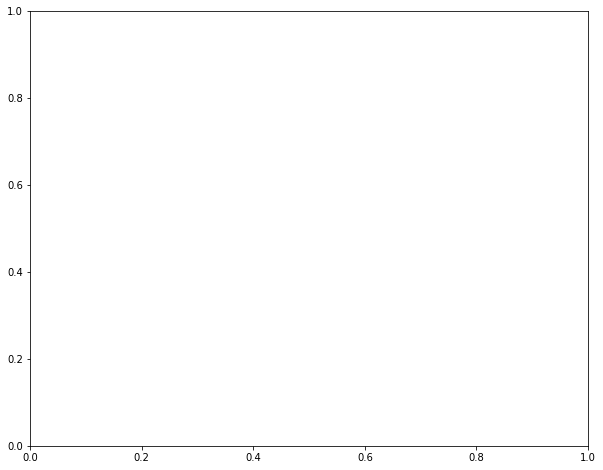

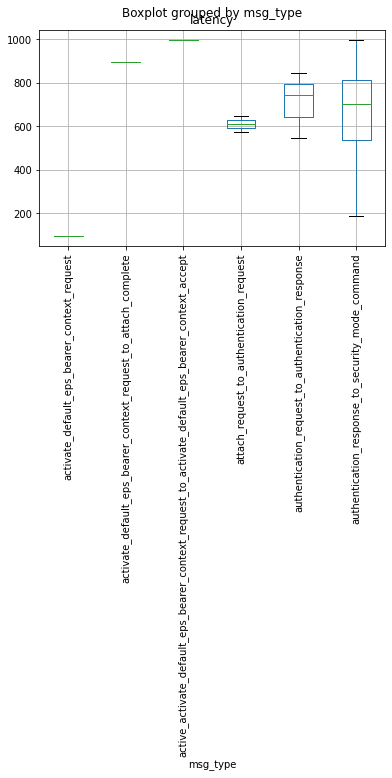

In [ ]:
# nas_attach_bias = []
# running_sum = 0
# for val in nas_attach_order:
#   nas_attach_bias.append(running_sum)
#   running_sum += driving_nas_medians[val]
# m_dict = {}
# for val in range(len(nas_attach_order)):
#   m_dict[nas_attach_order[val]] = nas_attach_bias[val]
drm = d_nas_df.copy()
# for row, cols in drm.iterrows():
#   if drm.at[row, "msg_type"] in nas_attach_order:
#     drm.at[row, "latency"] += m_dict[drm.at[row, "msg_type"]]

drm = drm.sort_values(by=['msg_type'])
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = drm.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(nas_attach_order), rotation = 90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'connection_request_to_connection_setup'),
 Text(0, 0, 'connection_setup_complete_to_security_mode_command'),
 Text(0, 0, 'connection_setup_to_connection_setup_complete'),
 Text(0, 0, 'handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'handover_measurement_report_to_connection_reconfiguration'),
 Text(0, 0, 'non_handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'non_handover_security_mode_complete_to_connection_reconfiguration'),
 Text(0, 0, 'security_mode_command_to_security_mode_complete')]

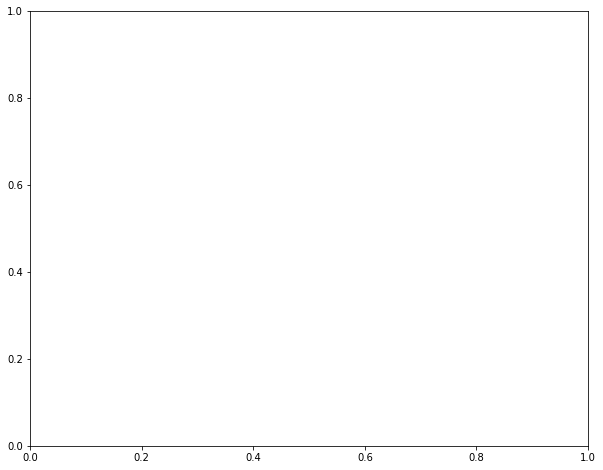

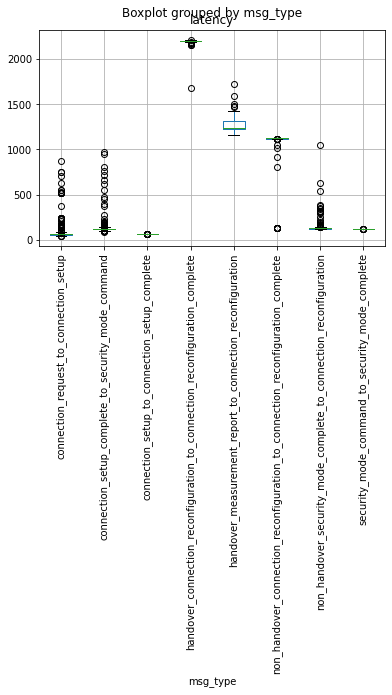

In [ ]:
rrc_attach_bias = []
running_sum = 0
for val in rrc_attach_order:
  rrc_attach_bias.append(running_sum)
  running_sum += walking_rrc_medians[val]
m_dict = {}
for val in range(len(rrc_attach_order)):
  m_dict[rrc_attach_order[val]] = rrc_attach_bias[val]
drm = w_rrc_df.copy()
for row, cols in drm.iterrows():
  if drm.at[row, "msg_type"] in rrc_attach_order:
    drm.at[row, "latency"] += m_dict[drm.at[row, "msg_type"]]

drm = drm.sort_values(by=['msg_type'])
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = drm.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(rrc_attach_order), rotation = 90)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'activate_default_eps_bearer_context_request'),
 Text(0, 0, 'activate_default_eps_bearer_context_request_to_attach_complete'),
 Text(0, 0, 'active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept'),
 Text(0, 0, 'attach_request_to_authentication_request'),
 Text(0, 0, 'authentication_request_to_authentication_response'),
 Text(0, 0, 'authentication_response_to_security_mode_command'),
 Text(0, 0, 'esm_information_request_to_esm_information_response'),
 Text(0, 0, 'esm_information_response_to_attach_accept'),
 Text(0, 0, 'security_mode_command_to_security_mode_complete'),
 Text(0, 0, 'security_mode_complete_to_esm_information_request')]

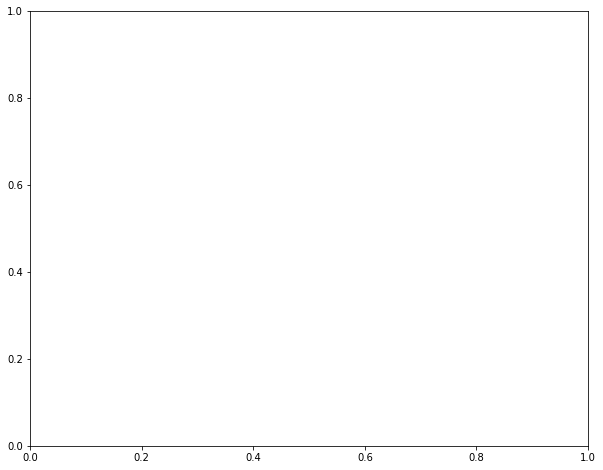

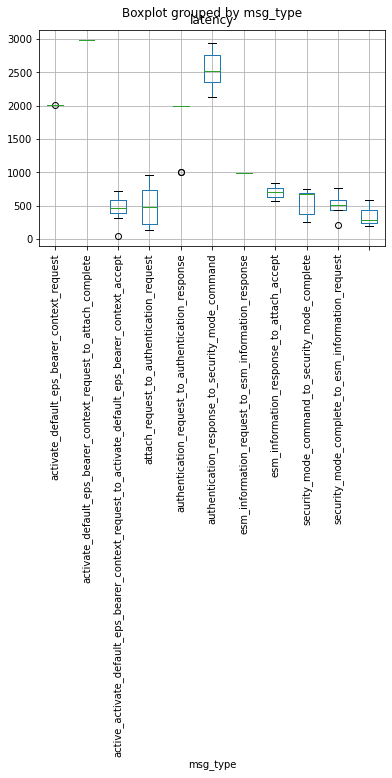

In [ ]:
nas_attach_bias = []
running_sum = 0
for val in nas_attach_order:
  nas_attach_bias.append(running_sum)
  if val in driving_nas_medians:
    running_sum += driving_nas_medians[val]
m_dict = {}
for val in range(len(nas_attach_order)):
  m_dict[nas_attach_order[val]] = nas_attach_bias[val]
drm = w_nas_df.copy()
for row, cols in drm.iterrows():
  if drm.at[row, "msg_type"] in nas_attach_order:
    drm.at[row, "latency"] += m_dict[drm.at[row, "msg_type"]]

drm = drm.sort_values(by=['msg_type'])
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = drm.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(nas_attach_order), rotation = 90)

In [ ]:
lolol = pd.Series([10.0])
indy = ["attach_request_to_authentication_request"]
lolol.index = indy
driving_nas_medians = driving_nas_medians.append(lolol)

In [ ]:
walking_nas_medians

msg_type
activate_default_eps_bearer_context_request_to_attach_complete                                       10.7550
active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept    988.9360
active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request                      470.0440
attach_complete_to_pdn_connectivity_request                                                         474.7840
esm_information_request_to_esm_information_response                                                 998.3830
esm_information_response_to_attach_accept                                                           524.9580
idle_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept      991.1050
idle_pdn_connectivity_request_to_activate_default_eps_bearer_context_request                        701.3245
service_request_to_pdn_connectivity_request                                                         666.9230
service_re

In [ ]:
d_nas_df["msg_type"].value_counts()

tracking_area_update_request_to_tracking_area_update_accept    4
service_request_to_tracking_area_update_request                3
service_request_to_pdn_connectivity_request                    2
esm_information_request_to_esm_information_response            1
authentication_request_to_authentication_response              1
authentication_response_to_security_mode_command               1
Name: msg_type, dtype: int64

# Handover Failure Ratio Visual (by Harrison)

In [21]:
walking_handover_events = [62,3]
driving_handover_events = [24,5]

walking_fail_portion = walking_handover_events[1]/sum(walking_handover_events)
driving_fail_portion = driving_handover_events[1]/sum(driving_handover_events)

print(walking_fail_portion, driving_fail_portion)
print(driving_fail_portion/walking_fail_portion)

0.046153846153846156 0.1724137931034483
3.735632183908046


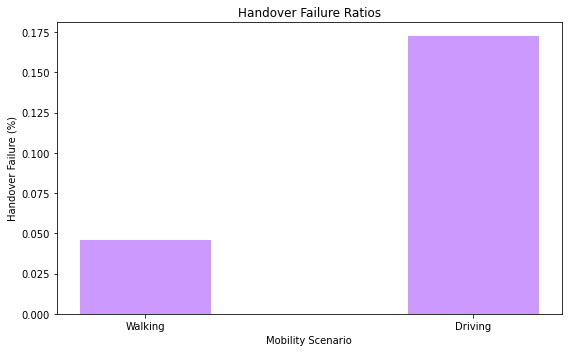

In [20]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5))

# creating the bar plot
plt.bar(["Walking", "Driving"], [walking_fail_portion, driving_fail_portion], color ='#cc99ff',
        width = 0.4)

plt.xlabel("Mobility Scenario")
plt.ylabel("Handover Failure (%)")
plt.title("Handover Failure Ratios")
fig.tight_layout()
plt.show()

In [ ]:
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()